# RandomForestClassifier y SVM

In [1]:
import pandas as pd #obtencion y analisis de dataframe
import matplotlib.pyplot as plt #graficos para el analisis
import seaborn as sns #graficos de calor
import warnings #Evita los errores
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Bienestar_estudiantil.csv')#Leemos el dataset para realizar el modelo
data.head() #Mostramos las 5 primeras filas del dataset

,Programa,Numero_matricula,Sexo,Edad,Estado_civil,Valor_matrícula,Estrato,Ingreso_mensual,Trabajo,Educacion_padre,Educacion_madre,Ocupacion_madre,Ocupacion_padre,Pregunta1,Pregunta2,Pregunta3,Pregunta4,Pregunta5,Total,Rango_SWLS
0,ingenieria catastral,4,1,19,1,2,4,5,1,9,9,8,9,6,7,6,7,7,33,6
1,ingenieria de sistemas,10,2,23,1,1,4,4,2,7,8,7,8,6,7,5,6,5,29,5
2,ingenieria de sistemas,7,2,21,1,2,3,4,1,8,9,6,9,5,6,7,6,6,30,6
3,ingenieria de sistemas,4,1,19,1,4,2,2,1,4,4,3,7,2,3,3,4,2,14,2
4,ingenieria electrica,3,1,19,1,1,5,6,2,9,10,9,8,6,6,7,7,7,33,6


Con base a la correlación de variables, se omitiran aquellas columnas que no infieren en el resultado para entrenar el modelo.
#### Variables que NO se utilizaran
    1.Programa_Academico
    2.Sexo
    3.Pregunta1
    4.Pregunta2
    5.Pregunta3
    6.Pregunta4
    7.Pregunta5
    8.Suma_Total

In [3]:
data.info() #Vemos la informacion del dataset, como la cantidad de variables y el numero de filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Programa          709 non-null    object
 1   Numero_matricula  709 non-null    int64 
 2   Sexo              709 non-null    int64 
 3   Edad              709 non-null    int64 
 4   Estado_civil      709 non-null    int64 
 5   Valor_matrícula   709 non-null    int64 
 6   Estrato           709 non-null    int64 
 7   Ingreso_mensual   709 non-null    int64 
 8   Trabajo           709 non-null    int64 
 9   Educacion_padre   709 non-null    int64 
 10  Educacion_madre   709 non-null    int64 
 11  Ocupacion_madre   709 non-null    int64 
 12  Ocupacion_padre   709 non-null    int64 
 13  Pregunta1         709 non-null    int64 
 14  Pregunta2         709 non-null    int64 
 15  Pregunta3         709 non-null    int64 
 16  Pregunta4         709 non-null    int64 
 17  Pregunta5       

In [4]:
#Eliminamos las variables que no se utilizaran para el modelo predictivo
TrueData = data.drop(['Programa','Sexo', 'Pregunta1', 'Pregunta2', 'Pregunta3', 'Pregunta4', 'Pregunta5', 'Total'], axis='columns')

In [5]:
TrueData.head() #Mostramos las primeras 5 filas de el dataset actualizado

,Numero_matricula,Edad,Estado_civil,Valor_matrícula,Estrato,Ingreso_mensual,Trabajo,Educacion_padre,Educacion_madre,Ocupacion_madre,Ocupacion_padre,Rango_SWLS
0,4,19,1,2,4,5,1,9,9,8,9,6
1,10,23,1,1,4,4,2,7,8,7,8,5
2,7,21,1,2,3,4,1,8,9,6,9,6
3,4,19,1,4,2,2,1,4,4,3,7,2
4,3,19,1,1,5,6,2,9,10,9,8,6


Tenemos el dataset con las variables que mas infieren con el resultado, ahora miraremos la cantidad de resultados para categoria en el "Rango_SWLS"

In [6]:
#Para saber que cantidad tuvo cada rango, realizamos lo siguiente.
one = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 1].count()
two = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 2].count()
three = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 3].count()
four = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 4].count()
five = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 5].count()
six = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 6].count()

In [7]:
one, two, three, four, five, six #cantidad de datos para cada rango que analizara el modelo

(22, 61, 129, 145, 191, 161)

## Creación del Modelo

Para crear el modelo predictivo es de necesidad partir la cantidad del dataseet, una parte de este dataset sera el que va evaluar el modelo creado.

In [8]:
#importamos de sklear train_test_split para divir el dataseet en una cantidad de entrenamiento y 
#otra de testeo. la cantidad de testeo sera del 30%
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(TrueData.drop(['Rango_SWLS'], axis='columns'), TrueData.Rango_SWLS, test_size=0.3)

### Random Forest Classifier

In [9]:
#Importamos de sklearn el algoritmo de Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)#Entrenamos nuestro modelo con las variables x, y de entrenamiento

RandomForestClassifier(n_estimators=10)

In [10]:
model.score(X_test, y_test)#Nos da un porcentaje de precision que tuvo el modelo creado

0.8826291079812206

### SVM

In [11]:
from sklearn.svm import SVC #Importamos de sklearn la maquina de vectores de soporte
svm_model = SVC() #creamos el algoritmo para el modelo
svm_model.fit(X_train, y_train) #entrenamos el modelo con la particion correspondiente

SVC()

In [12]:
svm_model.score(X_test, y_test)

0.8028169014084507

## Matriz de Confusion
Para describir el desempeño de los modelos de clasificación por clases, creamos la matriz de confusión. En particular, esta matriz representó el poder predictivo del clasificador RandomForestClassifier. Desde este punto de vista, los valores de la diagonal principal representan el grado de clases correctamente predichas.

In [13]:
y_predicted = model.predict(X_test) #Para realizar un grafico necesitamos las filas que se predijeron

Text(69.0, 0.5, 'Verdadero')

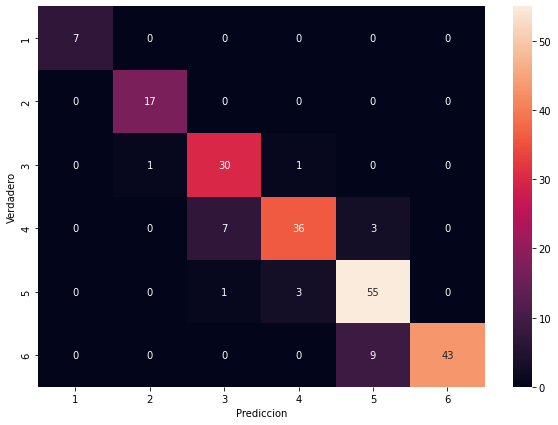

In [14]:
from sklearn.metrics import confusion_matrix #Importamos la matriz de confusion de sklearn
cm = confusion_matrix(y_test, y_predicted)#le pasamos los parametros a la matriz de confusion para futuro grafico

%matplotlib inline

plt.figure(figsize=(10,7)) #Establecemos el tamaño de el grafico
sns.heatmap(cm, 
            xticklabels = ['1','2','3','4','5','6'],
            yticklabels = ['1','2','3','4','5','6'],
            annot=True)#Generamos nuestro grafico con base a la informacion anterior
plt.xlabel('Prediccion')#El eje x seran los valores que se predijeron en el modelo
plt.ylabel('Verdadero') #El eje y seran los valores verdaderos del dataset 014

Como se puede observar, donde más tuvo desfases en la predicción, fue en el rango de SWL

## Puntaje de clasificación de precisión
el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto de etiquetas correspondiente en y_true. Para ello calculamos la estabilidad del puntaje obtenido en el score, asi garantizamos el valor otorgado.

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)#------

0.8826291079812206

La porcentaje de precision es acorde a lo obtenido anteriormente, por ende garantizamos que la precision de nuestro modelo es del 86,85%